<a href="https://colab.research.google.com/github/Wishmi-Sasika/MLOM-Labs/blob/main/MLOM_Practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
classes[9]

'truck'

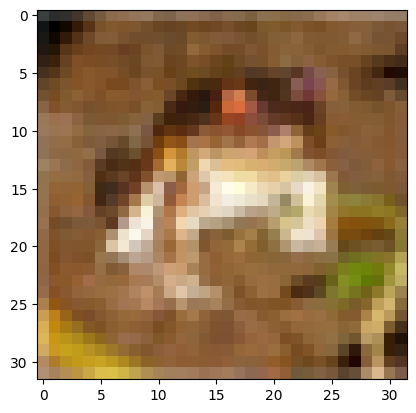

In [ ]:
plt.imshow (x_train[0])

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.colorbar()
    plt.grid (False)
    plt.show()

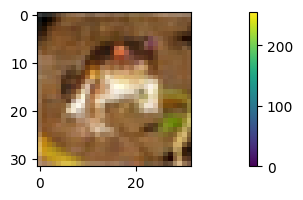

In [ ]:
plot_sample (x_train, y_train, 0)

In [ ]:
x_train = x_train / 255.0
y_test = y_test / 255.0

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
model = keras.Sequential ([
    keras.layers.Flatten (input_shape = (32, 32, 3)),
    keras.layers.Dense (3000, activation = 'relu'),
    keras.layers.Dense (1000, activation = 'relu'),
    keras.layers.Dense (10, activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit (x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 335s 214ms/step - loss: 1.8988 - accuracy: 0.3237
Epoch 2/5
1563/1563 [==============================] - 331s 212ms/step - loss: 1.6526 - accuracy: 0.4057
Epoch 3/5
1563/1563 [==============================] - 332s 212ms/step - loss: 1.5686 - accuracy: 0.4375
Epoch 4/5
1563/1563 [==============================] - 354s 226ms/step - loss: 1.5233 - accuracy: 0.4541
Epoch 5/5
1563/1563 [==============================] - 352s 225ms/step - loss: 1.4878 - accuracy: 0.4637


In [ ]:
model.evaluate (x_train, y_train)

1563/1563 [==============================] - 55s 35ms/step - loss: 1.4615 - accuracy: 0.4664


[1.4614551067352295, 0.46639999747276306]

In [ ]:
model = tf.keras.models.Sequential ([
    tf.keras.layers.Conv2D (filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    tf.keras.layers.MaxPooling2D (2, 2),

    tf.keras.layers.Conv2D (filters = 32, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D (2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense (64, activation = 'relu'),
    tf.keras.layers.Dense (10, activation = 'softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam (learning_rate=0.001)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,  # Split a portion for validation
    verbose=2  # Set verbose to 2 for more detailed training logs
)

Epoch 1/10
1250/1250 - 44s - loss: 1.3249 - accuracy: 0.0990 - val_loss: 1.2311 - val_accuracy: 0.0877 - 44s/epoch - 35ms/step
Epoch 2/10
1250/1250 - 41s - loss: 1.1681 - accuracy: 0.0996 - val_loss: 1.1712 - val_accuracy: 0.0822 - 41s/epoch - 33ms/step
Epoch 3/10
1250/1250 - 43s - loss: 1.0725 - accuracy: 0.1002 - val_loss: 1.1033 - val_accuracy: 0.1244 - 43s/epoch - 34ms/step
Epoch 4/10
1250/1250 - 44s - loss: 1.0045 - accuracy: 0.0998 - val_loss: 1.0543 - val_accuracy: 0.0696 - 44s/epoch - 35ms/step
Epoch 5/10
1250/1250 - 40s - loss: 0.9560 - accuracy: 0.1009 - val_loss: 1.0328 - val_accuracy: 0.1072 - 40s/epoch - 32ms/step
Epoch 6/10
1250/1250 - 40s - loss: 0.9181 - accuracy: 0.1010 - val_loss: 1.0159 - val_accuracy: 0.1003 - 40s/epoch - 32ms/step
Epoch 7/10
1250/1250 - 41s - loss: 0.8863 - accuracy: 0.1010 - val_loss: 1.0372 - val_accuracy: 0.1112 - 41s/epoch - 32ms/step
Epoch 8/10
1250/1250 - 42s - loss: 0.8532 - accuracy: 0.1005 - val_loss: 0.9911 - val_accuracy: 0.0884 - 42s/ep

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 440.6104 - accuracy: 0.3035
Test Accuracy: 0.3034999966621399


In [ ]:
model.evaluate (x_train, y_train)

1563/1563 [==============================] - 16s 10ms/step - loss: 0.8250 - accuracy: 0.1049


[0.8249790668487549, 0.10487999767065048]

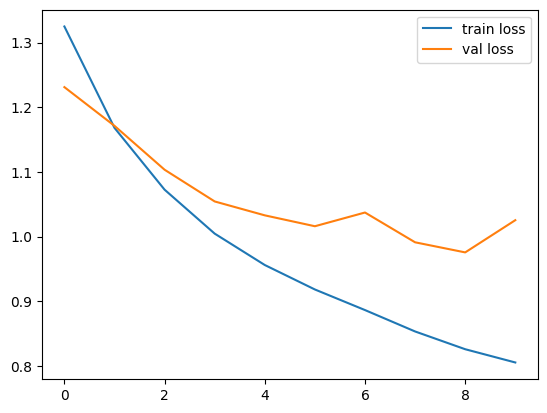

In [ ]:
plt.plot (history.history ['loss'], label='train loss')
plt.plot (history.history ['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_acc.png')
plt.show()

In [ ]:
plt.savefig('AccVal_acc.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
model.save_weights ('first_try.h5')

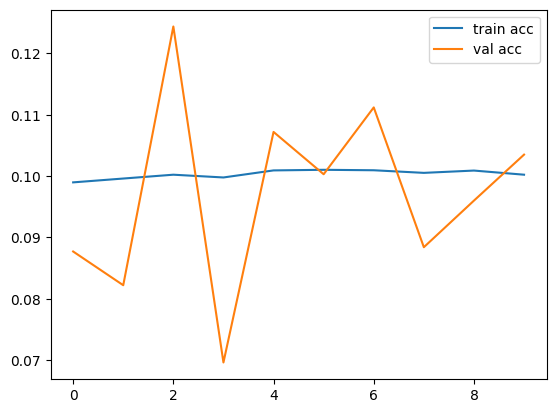

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the accuracy
plt.plot (history.history ['accuracy'], label='train acc')
plt.plot (history.history ['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig ('AccVal_acc')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               